In [82]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
import pandas as pd

In [83]:
Temp_df=pd.read_csv('Temp_FR_1980_2022.csv',sep=',',decimal='.',parse_dates=['Date']).set_index(["Date"])
index2019=(Temp_df.index.to_series().dt.year==2019)
Temp_2019_df=Temp_df[index2019][["temperature"]].rename(columns={"temperature": "Temperature"})

In [96]:
Temp_df2=pd.read_csv('Temp_FR_2017_2022.csv',sep=';',decimal='.',parse_dates=['Date']).set_index(["Date"])
index2019_2=(Temp_df2.index.to_series().dt.minute==0)&(Temp_df2.index.to_series().dt.year==2019)
Temp_2019_df_2=Temp_df2[index2019_2]

In [97]:
x=np.linspace(0,1,len(Temp_2019_df))
y=np.array(Temp_2019_df["Temperature"])
z=np.array(Temp_2019_df_2["Temperature"])

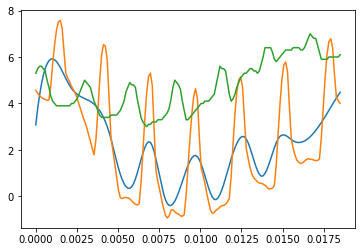

In [98]:
spl = UnivariateSpline(x, y)
spl.set_smoothing_factor(30000)
plt.plot(x[0:163], spl(x[0:163]))
plt.plot(x[0:163], y[0:163])
plt.plot(x[0:163], z[-163::])
plt.show()

In [105]:
import datetime as dt
Temp_df=Temp_df.reset_index()

In [110]:
print(Temp_df.Date.dt.hour)

0          0
1          1
2          2
3          3
4          4
          ..
350635    19
350636    20
350637    21
350638    22
350639    23
Name: Date, Length: 350640, dtype: int64


In [122]:
d=Temp_df["Date"][0].to_pydatetime()
delta=datetime.timedelta(hours=6)
pd.Timestamp(d+delta)

Timestamp('1980-01-01 06:00:00')